In [1]:
import pickle
from gensim.models.wrappers import LdaMallet, ldamallet
import numpy as np
import pandas as pd
import os
import datetime

In [2]:
def display_single_lda_topic(lda: LdaMallet, topic: int):
    topic = ", ".join([x[0] for x in lda.show_topic(topic)]) 

    return topic

In [3]:
def display_lda_topics(lda: LdaMallet):
    num_topics = lda.num_topics
    topics = [
        (i, 
            ", ".join([x[0] for x in lda.show_topic(i)]) 
        )
        for i in range(num_topics)
    ]
    return topics

In [4]:
def get_docs_topics(lda: LdaMallet, topic_threshold=0.01):
    """
    Remove topics with small contribution, default = 1%.
    Read topics from model_data/doctopics.txt
    """

    lda_doc_topics = lda.read_doctopics(
        lda.fdoctopics(), eps=topic_threshold, renorm=True
    )

    doc_topics = [
        x
        for x in lda_doc_topics
    ]

    return doc_topics

In [7]:
MODEL         = "data/models/100_it_10000/model"
# CORPUS        = "data/corpus_final.pickle"
DISCS_RAW     = "data/discursos_raw_all.pickle"

TIME_INTERVAL = 365/2 # 6 months
START_OFFSET  = 0
END_OFFSET    = 0

In [8]:
os.chdir("X:/Victor/Documents/TCC/new_discursos/src")
lda = LdaMallet.load(MODEL)
lda.mallet_path = "lib\\mallet-2.0.8\\bin\\mallet"
os.environ['MALLET_HOME'] = 'X:\\Programs\\Java\\mallet\\mallet-2.0.8'

docs_topics = get_docs_topics(lda)

# corpus = pickle.load(open(CORPUS, "rb"))
raw = pickle.load(open(DISCS_RAW, "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'data/discursos_raw_all.pickle'

In [7]:
valid_discs = [
    disc
    for disc in raw if disc["Conteudo"] != ''
]
len(valid_discs)

75060

In [8]:
dates = [x["IdentificacaoPronunciamento"]["DataPronunciamento"] for x in valid_discs]

In [9]:
len(dates)

75060

In [10]:
dates = [
    (i, d)
    for i, d in enumerate(dates)
]

In [11]:
sorted_dates = sorted(
    dates,
    key=lambda x: x[1]
)

In [12]:
last = len(sorted_dates) - 1

sorted_dates[last]

(63637, '2020-02-17')

In [13]:
discs = sorted_dates[START_OFFSET: last - END_OFFSET]

In [14]:
disc_topics = [
    (i, d, docs_topics[i])
    for (i, d) in discs
]

In [66]:
disc_topics = [
    (i, d, 
        sorted(t, key=lambda x: x[1], reverse=True)[0:5] # take top 5 topics
    )
    for (i, d, t) in disc_topics
]

In [67]:
disc_topics[last - 1]

(59602,
 '2020-02-17',
 [(26, 0.1321626617375231),
  (60, 0.12846580406654345),
  (77, 0.11552680221811461)])

In [9]:
display_lda_topics(lda)

[(0,
  'educacao, escola, professor, ensino, alunos, qualidade, fundamental, estudo, medio, educacional'),
 (1,
  'pronunciamento, permite, assunto, prazo, ouco, oportunidade, conhecimento, concede, exas, ouvi'),
 (2,
  'mundo, paises, unidos, estados, internacional, nacoes, americano, europa, china, norteamericano'),
 (3,
  'pequenos, santacatarina, empresas, empreendimentos, empresarios, emprego, colegas, catarinense, cooperativas, micro'),
 (4,
  'comunicacao, internet, acesso, servicos, radio, telefone, informacao, televisao, cidadao, informacoes'),
 (5,
  'minutos, tribuna, interrupcao, queremos, belo, mostra, concluir, paraense, pedido, pronunciamento'),
 (6,
  'saude, medico, hospital, atender, profissionais, medicina, populacao, pacientes, servicos, plano'),
 (7,
  'problema, resolver, solucao, precisamos, encontro, busca, dificuldades, enfrentar, situacao, condicoes'),
 (8,
  'agraria, assentamentos, trabalho, propriedade, reforma, terras, rural, movimento, incra, familia'),
 

In [69]:
def generate_topic_plot(
    disc_topics,
    topic
):
    filtered_speeches = [
        (i, d, 
            list(filter(lambda x: x[0] == topic, t))
        )
        for (i, d, t) in disc_topics
    ]

    # take only speeches with non empty topic list
    filtered_speeches = list(
        filter(
            lambda x: len(x[2]) > 0,
            filtered_speeches
        )
    )

    df = pd.DataFrame(filtered_speeches, columns=["id", "date", "topics"])
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day

    df_grouped = df.groupby(df['year'])['id'].nunique()
    
    # df.info()
    xticks = df_grouped.index.to_list()
    # yticks = df_grouped.values.tolist()

    plot = df_grouped.plot(marker='o', linestyle='-', grid=True, figsize=(17,7))

    plot.set_title("Topic {}\n{}".format(
        topic, display_single_lda_topic(lda, topic))
        )

    plot.set_xticks(xticks)
    # plot.set_yticks(yticks)

    plot.xaxis.set_tick_params(rotation=45)

    outdir = "results/time_topics"

    fig = plot.get_figure()
    # fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')

    fig.savefig("{}/topic_{}.png".format(outdir, topic))
    fig.clf()


    
# generate_topic_plot(disc_topics=disc_topics, topic=0)

In [19]:
for topic in range(0, 100):
    generate_topic_plot(disc_topics=disc_topics, topic=topic)


<Figure size 1224x504 with 0 Axes>

In [84]:
disc_topics2 = [
    (
        id,
        date,
        [x[0] for x in topics]
    )
    for (id, date, topics) in disc_topics
]
disc_topics2[0:10]

[(32151, '1980-12-05', [21, 25, 88]),
 (39526, '1988-03-15', [78, 8, 87]),
 (13169, '1994-01-03', [60, 52, 7]),
 (51924, '1994-01-03', [27, 70, 81]),
 (21931, '1994-01-05', [93, 7, 40]),
 (27418, '1994-01-05', [93, 7, 97]),
 (46482, '1994-01-05', [80, 7, 82]),
 (34616, '1994-01-06', [4, 66, 95]),
 (47872, '1994-01-06', [4, 7, 61]),
 (20525, '1994-01-10', [20, 29, 38])]

In [91]:
filtered_speeches = [
    (
        id, 
        date, 
        topics
    )
    for (id, date, topics) in disc_topics2
    if topic in topics
]
len(filtered_speeches)


[(27197, '1994-01-26', [78, 8, 12]),
 (53088, '1994-03-14', [12, 99, 37]),
 (42150, '1994-04-14', [24, 7, 12]),
 (42158, '1994-04-18', [35, 52, 12]),
 (46471, '1994-05-23', [35, 12, 61]),
 (21029, '1995-01-05', [12, 61, 96]),
 (28224, '1995-01-18', [33, 12, 36]),
 (33201, '1995-01-26', [12, 93, 8]),
 (21926, '1995-02-16', [12, 62, 1]),
 (16925, '1995-03-09', [66, 7, 12])]

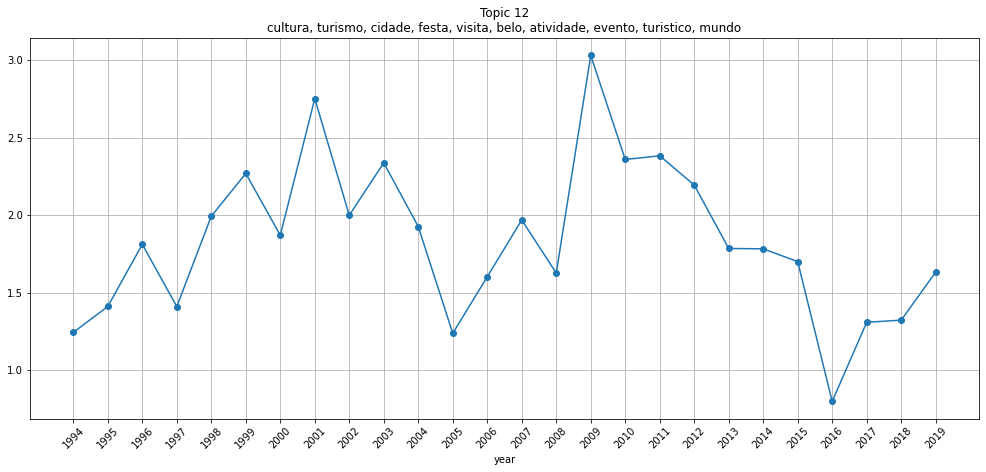

In [93]:
topic = 12

filtered_speeches = [
    (
        id, 
        date, 
        topics
    )
    for (id, date, topics) in disc_topics2
    if topic in topics
]

# all speeches
df_year_all = pd.DataFrame([
    (i, d,  None)
    for (i, d, t) in disc_topics
], columns=["id", "date", "topics"])
df_year_all['date'] = pd.to_datetime(df_year_all['date'])
df_year_all['year'] = df_year_all['date'].dt.year
df_year_all_grouped = df_year_all[['year','id']].groupby('year').count()


df = pd.DataFrame(filtered_topic_speeches, columns=["id", "date", "topics"])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# df_grouped = df.groupby(df['year'])['id'].nunique()

df_grouped = df[['year','id']].groupby('year').count()
df_grouped["Total"] = df_year_all[['year','id']].groupby('year').count()
df_grouped['Percentage'] = df_grouped['id'] * 100 /df_grouped['Total']

df_grouped



df_grouped = df_grouped['Percentage']
df_grouped



xticks = df_grouped.index.to_list()
yticks = df_grouped.values.tolist()
plot = df_grouped.plot(marker='o', linestyle='-', grid=True, figsize=(17,7))

plot.set_title("Topic {}\n{}".format(
    topic, display_single_lda_topic(lda, topic))
    )

plot.set_xticks(xticks)
# plot.set_yticks(yticks)
# plot.tick_params(direction="in")

plot.xaxis.set_tick_params(rotation=45)

